In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

for i in [pd, np, mpl]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
matplotlib 3.5.3


# 1-2. 결측치, 이상치 처리


## 0. 데이터셋 소개

### Titanic

[Titanic](https://www.kaggle.com/competitions/titanic/data) 탑승객의 생존 유무를 담은 데이터셋 입니다.

|Data|Description|Dictionary|
|:----|:----------|:---|
|PassengerId|Passenger Id, Index||
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|Name| |
|Sex|Sex| |
|Age|Age in years| |
|Sibsp|# of siblings / spouses aboard the Titanic| |
|Parch|# of parents / children aboard the Titanic| |
|Ticket|Ticket number| |
|Fare|Passenger fare| |
|Cabin|Cabin number| |
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


다양한 형식의 데이터를 가지고 있으며, 여러 가지 아이디어를 생각하고 시도할 만한 요소가 많게끔 기획된 데이터셋입니다.

In [4]:
df_titanic = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Wild blueberry

[Wild blueberry](https://data.mendeley.com/datasets/p5hvjzsvn8/1) 야생 블루베리의 수확량을 시뮬레이션한 데이터셋입니다.


|Features|Unit|Description|
|:--------|:----|:-----------|
|Row#||Index|
|Clonesize|m2|The average blueberry clone size in the field|
|Honeybee|bees/m2/min|Honeybee density in the field|
|Bumbles|bees/m2/min|Bumblebee density in the field|
|Andrena|bees/m2/min|Andrena bee density in the field|
|Osmia|bees/m2/min|Osmia bee density in the field|
|MaxOfUpperTRange|℃|The highest record of the upper band daily air temperature during the bloom season|
|MinOfUpperTRange|℃|The lowest record of the upper band daily air temperature|
|AverageOfUpperTRange|℃|The average of the upper band daily air temperature|
|MaxOfLowerTRange|℃|The highest record of the lower band daily air temperature|
|MinOfLowerTRange|℃|The lowest record of the lower band daily air temperature|
|AverageOfLowerTRange|℃|The average of the lower band daily air temperature|
|RainingDays|Day|The total number of days during the bloom season, each of which has precipitation larger than zero|
|AverageRainingDays|Day|The average of raining days of the entire bloom season|
|fruitset||The amount of fruit per tree|
|fruitmass||The mass of a fruit|
|seeds||The mass of a seed|
|yield||The amount of yield|

In [5]:
df_berry = pd.read_csv('data/wild_blueberry.csv', index_col='Row#')
df_berry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 17 columns):
clonesize               777 non-null float64
honeybee                777 non-null float64
bumbles                 777 non-null float64
andrena                 777 non-null float64
osmia                   777 non-null float64
MaxOfUpperTRange        777 non-null float64
MinOfUpperTRange        777 non-null float64
AverageOfUpperTRange    777 non-null float64
MaxOfLowerTRange        777 non-null float64
MinOfLowerTRange        777 non-null float64
AverageOfLowerTRange    777 non-null float64
RainingDays             777 non-null float64
AverageRainingDays      777 non-null float64
fruitset                777 non-null float64
fruitmass               777 non-null float64
seeds                   777 non-null float64
yield                   777 non-null float64
dtypes: float64(17)
memory usage: 109.3 KB


## 1. 결측치 처리

### 결측 레코드 제거

결측이 있는 데이터들을 제거합니다.


- 처리는 쉽지만 정보의 손실이 있습니다.

In [6]:
# 결측이 있으면 제거합니다.
# 실제로 반영을 하려면 inplace=True를 dropna에 전달하거나 df_titanic = df_titanic.dropna() 처럼 대입을 시킵니다.
df_titanic.dropna() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [7]:
# 결측을 삭제후 결과를 확인합니다.
df_titanic.dropna().isna().sum().to_frame().T

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0,0,0,0,0,0


### 단순 대체

#### 범주형 데이터

1. 결측 자체도 하나의 범주값으로 보고, 결측을 의미하는 범주를 생성하여 대체합니다.


**[Ex.1]**  

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
    
Embarked의 결측치를 살펴보고 처리합니다.
    
</div>

In [5]:
# Embark에 등장하는 범주를 가져와 봅니다.
df_titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
# pd.Series.isna를 통해 결측 유무를 가져올 수 있습니다.
df_titanic.loc[df_titanic['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
# pd.Series.fillna를 통해 결측치를 대체할 수 있습니다.
df_titanic['Embarked'] = df_titanic['Embarked'].fillna('Unk') # Unknown 범주를 Unk 약어로 나타냅니다.

In [8]:
df_titanic['Embarked'].value_counts()

S      644
C      168
Q       77
Unk      2
Name: Embarked, dtype: int64

2. 최빈값으로 대체

**[Ex.2]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

Cabin은 복수의 요소로 구성이 되어 있고, 공백으로 구분 되어 있습니다. 

이 중 맨 처음 나오는 Cabin만 남깁니다.

앞자리 알파벳을 Cabin_Type 그리고, 뒷자리 숫자는 Cabin_No로 나누어 파생 변수를 만듭니다. 

Cabin_Type을 Pclass 별로 Cabin_Type의 최빈값으로 대체합니다. 만일 동수가 등장할 경우 사전순으로 앞에 있는 것으로 대체합니다.
    
</div>

In [9]:
# 공백으로 나눕니다.
# 873번 데이터의 Cabin에는 여러 개의 객실이 있습니다.
df_titanic.loc[df_titanic['Cabin'].notna(), 'Cabin'].str.split(' ')

PassengerId
2                [C85]
4               [C123]
7                [E46]
11                [G6]
12              [C103]
            ...       
872              [D35]
873    [B51, B53, B55]
880              [C50]
888              [B42]
890             [C148]
Name: Cabin, Length: 204, dtype: object

In [10]:
# 1. Cabin에서 미결측치만 가져오고 공백으로 나눕니다.
# 2. 맨 처음 나오는 Cabin 만을 남깁니다.
# 3. Cabin_Type과 Cabin_No로 나눕니다
df_titanic.loc[df_titanic['Cabin'].notna(), 'Cabin'].str.split(' ')\
    .apply(lambda x: x[0])\
    .apply(lambda x: pd.Series([x[:1], x[1:]], index=['Cabin_Type', 'Cabin_No']))

,Cabin_Type,Cabin_No
PassengerId,,
2,C,85
4,C,123
7,E,46
11,G,6
12,C,103
...,...,...
872,D,35
873,B,51
880,C,50


In [11]:
# Cabin_Type과 Cabin_No를 df_titanic에 넣어 줍니다.
df_titanic[['Cabin_Type', 'Cabin_No']] = \
    df_titanic.loc[df_titanic['Cabin'].notna(), 'Cabin'].str.split(' ')\
    .apply(lambda x: x[0])\
    .apply(lambda x: pd.Series([x[:1], x[1:]], index=['Cabin_Type', 'Cabin_No']))

In [12]:
# 최빈값 구하기: pd.Series.mode
df_titanic['Cabin_Type'].mode()

0    C
dtype: object

**pd.Sereis.mode()** : 최빈값을 구합니다. 복수의 최빈값이 나오는 경우를 고려하고 있어 Series로 반환됩니다.

In [13]:
# 최빈값은 복수일 수 있으므로, Series를 반환합니다.
# 요건에 맞게 사전 순 정렬을 합니다.
# 그 다음에 첫번째 요소를 가져 옵니다.
df_titanic['Cabin_Type'].mode().sort_values().iloc[0]

'C'

In [14]:
# 이 루틴을 Pclass 별로 수행합니다.

df_titanic.groupby('Pclass')['Cabin_Type'].agg(
    lambda x: x.mode().sort_values().iloc[0]
)

Pclass
1    C
2    F
3    F
Name: Cabin_Type, dtype: object

In [15]:
# 이를 이용해 결측 처리한 Seriies를 만듭니다.

df_titanic.groupby('Pclass')['Cabin_Type'].transform(
    lambda x: x.fillna(x.mode().sort_values().iloc[0])
)

PassengerId
1      F
2      C
3      F
4      C
5      F
      ..
887    F
888    B
889    F
890    C
891    F
Name: Cabin_Type, Length: 891, dtype: object

In [16]:
# fillna에는 Series를 입력으로 받을 수 있습니다.
# fillna에 Series를 전달하면, 결측인 요소에 해당는 요소를 Series에서 가져와서 대체합니다.
df_titanic['Cabin_Type'].fillna(
    df_titanic.groupby('Pclass')['Cabin_Type'].transform(
        lambda x: x.mode().sort_values().iloc[0]
    )
)

PassengerId
1      F
2      C
3      F
4      C
5      F
      ..
887    F
888    B
889    F
890    C
891    F
Name: Cabin_Type, Length: 891, dtype: object

In [17]:
# 결측 처리 결과를 반영합니다.

df_titanic['Cabin_Type'] = df_titanic.groupby('Pclass')['Cabin_Type'].transform(
    lambda x: x.fillna(x.mode().sort_values().iloc[0])
)

In [18]:
df_titanic['Cabin_Type'].value_counts()

F    660
C     99
B     47
D     33
E     32
A     15
G      4
T      1
Name: Cabin_Type, dtype: int64

#### 수치형 데이터

1. 평균(중심 통계량: 평균, 중앙값, 최빈값)으로 대체

In [19]:
# 평균으로 대체하여 반영합니다.
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())

2. 보간법(Interpolation)

   순서가 있는 데이터(시간순, 위치순)인 경우에  앞, 뒤 값을 활용하여 결측치를 대체합니다.

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**pd.Series.interpolate**, **pd.DataFrame.interpolate**
    
</div>

**Linear Interpolation**

> $\frac{y - y_0}{x - x_0} = \frac{y_1 - y_0}{x_1 - x_0}$

> $y = y_0 + (x - x_0)\frac{y_1 - y_0}{x1 - x_0}$

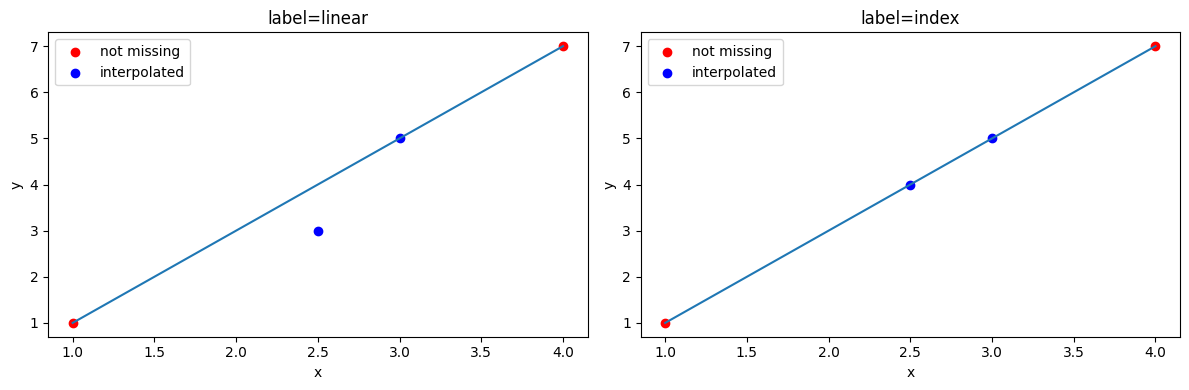

In [8]:
# 샘플 데이터를 만듭니다.
s = pd.Series([1, np.nan, np.nan, 7], index=[1, 2.5, 3, 4])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 결측이 아닌 두점을 잇는 선을 그립니다.
# linear: x 값은 고려하지 않고, 등간격이라는 가정하에 선형 보간을 합니다.
# index: index의 값이 x값이라고 가정하고 선형 보간을 합니다.
for i, ax in zip(['linear', 'index'], axes):
    ax.plot(s.loc[s.notna()])

    # 결측이 아닌 값을 찍습니다.
    s.loc[s.notna()].pipe(
        lambda x: ax.scatter(x=x.index, y=x.values, color='red', label='not missing')
    )
    # 결측인 값을 보간한 값을 찍습니다.
    s.interpolate(method=i).loc[s.isna()].pipe(
        lambda x: ax.scatter(x=x.index, y=x.values, color='blue', label='interpolated')
    )

    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("label=" + i)
plt.tight_layout()
plt.show()

#### Regression

- 다른 변수를 이용하여 결측치를 예측하는 모델을 만들어, 모델의 예측값으로 결측치을 대체합니다.

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

Age'의 결측값을 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked' 를 이용하여 예측 모델을 만들어 예측치로 결측값을 대체합니다.

예측 모델은 Random Forest Regression 모델로 하고, Pclass, Sex, Embarked는 가변수화 합니다. 나머지 입력값은 그대로 모델에 사용합니다.
    
</div>

In [21]:
# Age로 예시를 듭니다.
# Age를 위에서 결측을 처리했으므로, Age를 다시 결측 처리하기 위해 원래 데이터를 불러옵니다.
df_titanic = pd.read_csv('data/titanic.csv')
# Embarked는 최빈값으로 결측을 처리합니다.
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().iloc[0])

In [22]:
# 전처리 단계의 출력을 바로 모델에 전달 될 수 있도록 make_pipeline을 사용하여 Pipeline을 구성토록 합니다.
from sklearn.pipeline import make_pipeline
# ColumnTranformer를 사용하여 변수별 전처리 과정을 설정할 수 있도록 합니다.
from sklearn.compose import ColumnTransformer
# 가변수 처리기를 가져옵니다.
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# OneHotEncoder는 Pclass, Sex, Embarked
# SibSp, Parch, Fare는 처리 없이 통과 시킵니다.
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Pclass', 'Sex', 'Embarked']), # (이름, 처리기, 처리 대상 변수)
    ('pt', 'passthrough', ['SibSp', 'Parch', 'Fare'])
])

reg_rf = make_pipeline(
    ct,
    RandomForestRegressor(
        n_estimators=100, # RandomForest에서 사용할 의사 결정 나무의 수를 100개로 합니다.
        random_state=123) # random_state에 값을 지정하여 실행시 동일한 결과를 얻게 설정합니다.
)
X_rf = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Fare'] # 입력변수 리스트 입니다.
# Regression 토픽에 중심을 두겠습니다: 모델에 대한 검증은 생략하고 바로 학습을 합니다.

df_titanic.loc[df_titanic['Age'].notna()].pipe(
    lambda x: reg_rf.fit(x[X_rf],  x['Age'])
) # 모델을 학습시킵니다.
"""
위 루틴과 동일한 루틴입니다. 
위 구문은 아래 구문에 df_titaninc['Age'].notna()로 필터링 2회 했던 것을 pipe를 통해 줄여낸 것입니다.
reg_rf.fit(
    df_titanic.loc[df_titanic['Age'].notna(), X_rf], 
    df_titanic.loc[df_titanic['Age'].notna(),'Age']
) 
"""

# 결측값에 예측 결과를 적용합니다.
df_titanic.loc[df_titanic['Age'].isna(), 'Age'] = \
    reg_rf.predict(df_titanic.loc[df_titanic['Age'].isna(), X_rf])

## 이상치 처리

- **IQR**(Inter Quantile Range)을 통한 이상치 판별

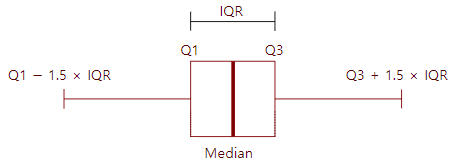

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

$Q_1 - 1.5×IQR ≤X≤ Q_3 + 1.5×IQR$

$Q_1$: 제1사분위수, $Q_3$: 제3사분위수

$IQR = Q_3 - Q_1$

IQR에 곱해진 1.5는 경우에 따라 달라질 수 있습니다.
    
</div>

### 이상치 제거

- 이상치로 판단된 데이터를 제거합니다.

**[Ex.4]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_berry 셋의 fruitset, fruitmass, seeds 가

각 변수별로 $Q_1$, $Q_3$, $IQR$을 구하여, 이상치 여부를 판별합니다.

> $Q_1 - 1.5×IQR ≤X≤ Q_3 + 1.5×IQR$

이중에 하나라도 이상치라면 제거하여 df_berry2셋을 만듭니다.
    
</div>

In [23]:
df_iqr = df_berry[['fruitset', 'fruitmass', 'seeds']].apply(
    lambda x: x.quantile([0.25, 0.75]).rename({0.25:'Q1', 0.75: 'Q3'}) # 각 변수의 1사분위와 3사분위를 구합니다.
).T.assign(
    IQR = lambda x: x['Q3'] - x['Q1'] # IQR을 구합니다.
).assign(
    LB = lambda x: x['Q1'] - 1.5 * x['IQR'], # 하한선을 계산합니다.
    UB = lambda x: x['Q3'] + 1.5 * x['IQR'] # 상한선을 계산합니다.
)
df_iqr

,Q1,Q3,IQR,LB,UB
fruitset,0.454725,0.561297,0.106571,0.294868,0.721153
fruitmass,0.416281,0.476149,0.059869,0.326478,0.565952
seeds,33.116091,39.239668,6.123577,23.930726,48.425033


In [24]:
# 각변수가 하한선 또는 상한선에서 벗어났는지 확인합니다.
df_is_outlier = df_berry[['fruitset', 'fruitmass', 'seeds']].apply(
    lambda x: (x < df_iqr.loc[x.name, 'LB']) | (x > df_iqr.loc[x.name, 'UB'])
)
df_is_outlier

,fruitset,fruitmass,seeds
Row#,,,
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
772,False,False,False
773,False,False,False
774,False,False,False


In [25]:
# 이상치가 하나라도 있는 행을 뽑아 봅니다.

df_berry.loc[df_is_outlier.any(axis=1), ['fruitset', 'fruitmass', 'seeds']]

,fruitset,fruitmass,seeds
Row#,,,
6,0.284443,0.352186,26.101179
7,0.246568,0.342826,25.042361
16,0.288159,0.359459,26.487322
17,0.279536,0.354415,26.282356
18,0.233554,0.335339,24.320627
32,0.262140,0.349354,25.433530
47,0.283055,0.355876,26.054692
766,0.192732,0.311921,22.079199
768,0.249335,0.320727,23.412776


In [26]:
# 이상치에 해당하는 인덱스로, 이상치를 제거한 DataFrame을 df_berry2로 지정합니다.

df_berry2 = df_berry.drop(index=df_berry.loc[df_is_outlier.any(axis=1)].index)

### 범위 한정(clipping)

하한값을 벗어난 경우 하한값으로 대체하고

상한값을 벗어나 경우 상한값으로 대체시킵니다.

**pd.Seris.clip**

**[Ex.5]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_berry 셋의 fruitset, fruitmass, seeds 가

각 변수별로 $Q_1$, $Q_3$, $IQR$을 구하여, 이상치 여부를 판별을 합니다.

> $Q_1 - 1.5×IQR ≤X≤ Q_3 + 1.5×IQR$

하한값을 벗어났을 경우 하한값으로 대체하고,

상한값을 벗어났을 경우는 상한값으로 대체하여 df_berry3셋을 만듭니다.
    
</div>

In [27]:
# Ex.4에서 사용했던 df_iqr을 사용해봅니다.
df_iqr

,Q1,Q3,IQR,LB,UB
fruitset,0.454725,0.561297,0.106571,0.294868,0.721153
fruitmass,0.416281,0.476149,0.059869,0.326478,0.565952
seeds,33.116091,39.239668,6.123577,23.930726,48.425033


In [28]:
df_berry3 = df_berry.copy()
# clip(하한, 상한)을 통해 상한과 하한으로 값을 제한합니다.
# apply에서 넘어온 Series의 name에는 해당 columns명이 들어 있습니다. 
# 이를 통해 iqr에서 하한(LB), 상한(UB)를 가져오고
# pd.Series.clip을 통해 하한과 상한으로 값이 들어 가도록합니다.
df_berry3[['fruitset', 'fruitmass', 'seeds']] = df_berry3[['fruitset', 'fruitmass', 'seeds']].apply(
    lambda x: x.clip(df_iqr.loc[x.name, 'LB'], df_iqr.loc[x.name, 'UB']) 
)

df_berry3

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
